<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/CheckP_Unsup_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Checkpoint Objective** ⚡

This project requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFF_PURCHASES: Maximum purchase amount done in one-go

 INSTALLMENTS_PURCHASES: Amount of purchase done in installment

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

**Instructions**

Load your dataset.
Use hierarchical clustering to identify the inherent groupings within your data.
Plot the clusters.
Plot the dendrogram. Use k-means clustering.
Try different k values and select the best one.
Plot the clusters.
Compare the two results.
Bonus: search for another validation metric

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans



In [ ]:
#Show head of the dataset
#Convert the csv file to dataframe

data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Missing values in Columns :    
-   CREDIT_LIMIT
- MINIMUM_PAYMENTS

**Handling Missing Values** ☀

In [ ]:
#we can notice that missing values are almost all found on Credit Limit and Minimum Payments columns
data[data['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


<Axes: ylabel='MINIMUM_PAYMENTS'>

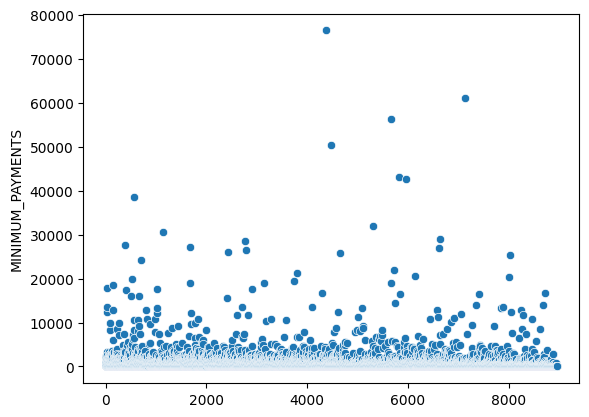

In [ ]:
sns.scatterplot(data=data['MINIMUM_PAYMENTS'])

Vu la présence de valeurs aberrantes et le fait que la moyenne y soit sensible nous allons utiliser la médiane. Et les valeurs manquantes sont assez nombreuses.

In [ ]:
#Replacing missing values for column 'MINIMUM_PAYMENTS'
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace = True)

In [ ]:
data[data['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


<Axes: ylabel='CREDIT_LIMIT'>

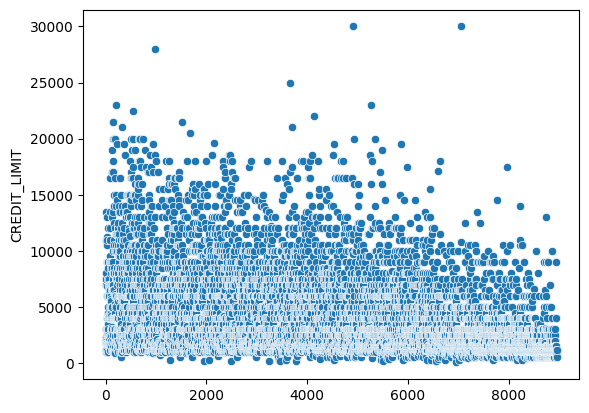

In [ ]:
sns.scatterplot(data=data['CREDIT_LIMIT'])


Puisqu'il n'y a qu'une seule valeur manquante sur notre colonne nous allons utiliser la moyenne malgré la présence de valeurs aberrantes.

In [ ]:
#Replacing missing value for column 'CREDIT_LIMIT'
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

Unsupervised Learning 🦾

In [ ]:
#Clustering Preprocessing
data=data.drop("CUST_ID", axis=1)

In [ ]:
#Use hierarchical clustering to identify the inherent groupings within our data
model=AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')

#Applying agglomerative algorithm with 10 clusters, using euclidean distance as a metric
clust_labels=model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


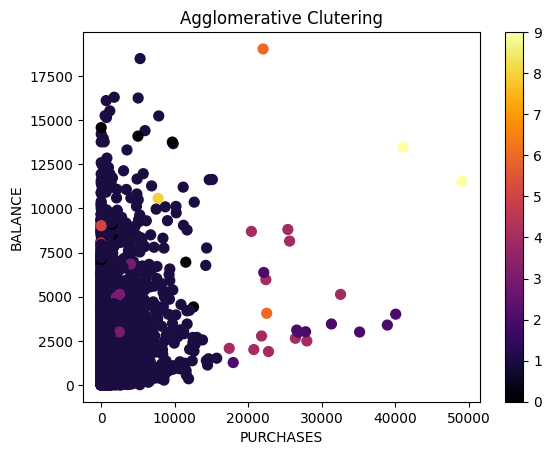

In [ ]:
#Plot the clusters

#Agglomerative cluster plot
#Plot containing the clusters.
#Each colored group represents a cluster.

import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ["BALANCE"] , c= agglomerative[0], s=50, cmap='inferno')
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("BALANCE")
plt.colorbar(scatter)


OBSERVATIONS 💰


- Among the Dark Purple's customers we can see those who have hight and low balance but do less purchases.They are careful ones.  
- The Purperous Purple and Light purple represent customers with average balance and average spending. They are normal customers
- The Emminence Purple represents customers with low balance but tend to spend a lot. They represent extravagants  
- The yellow and orange represent customers with high balance who tend to de high purchases. They are generous ones




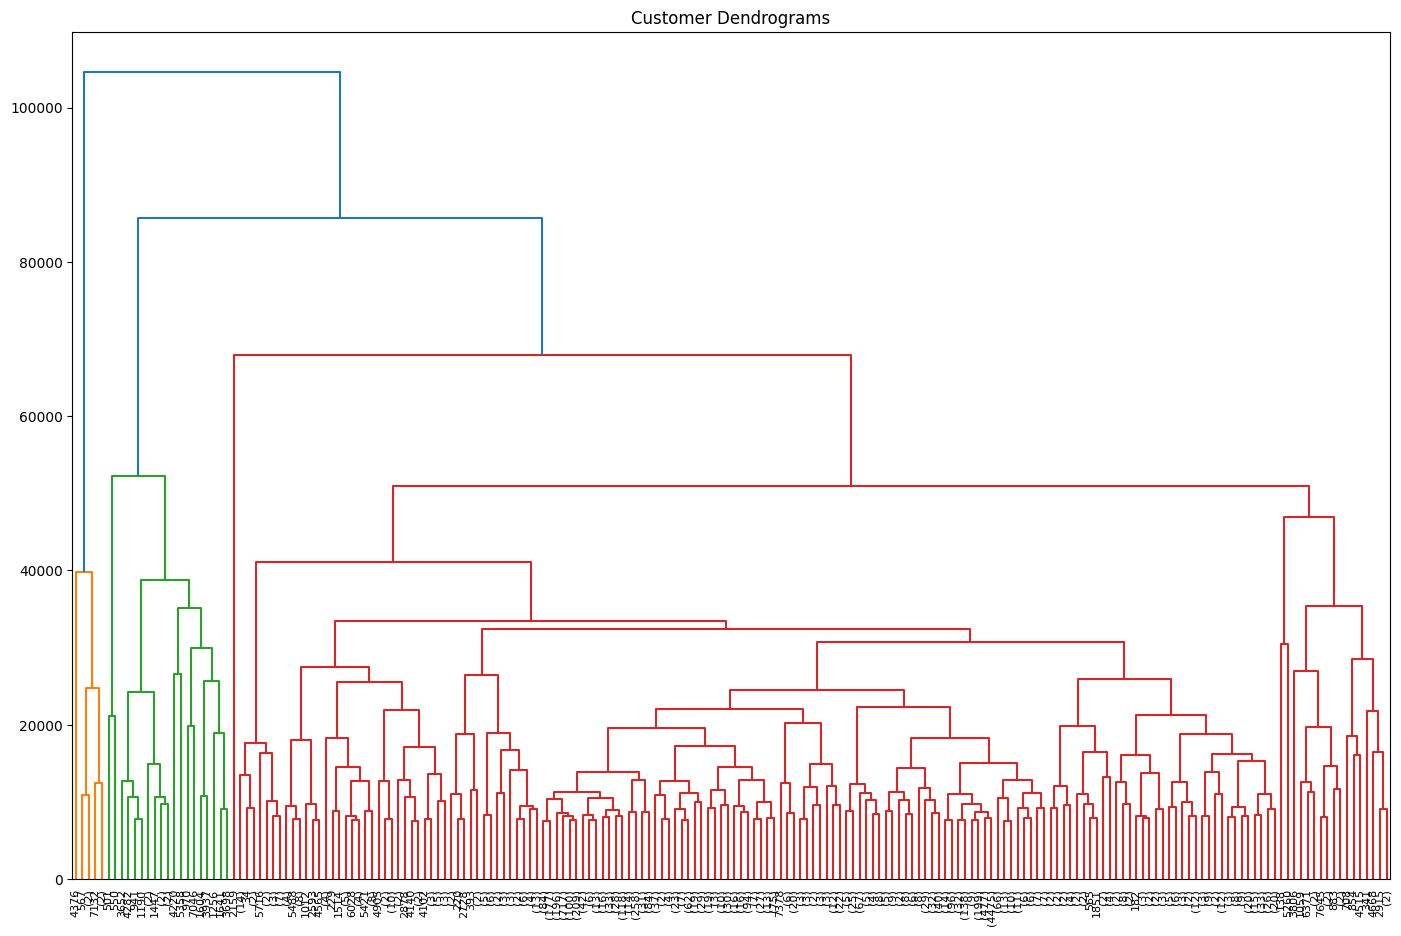

In [ ]:
#Plot the dendrogram

#Dendrogram visualization
plt.figure(figsize=(17,11))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"),truncate_mode='lastp',p=200, leaf_rotation=90., leaf_font_size=8.,)

In [ ]:
#Use k-means clustering

#Kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)
#Kmeans.labels_array()
model = KMeans(5)
model.fit(data)
y_kmeans = model.predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


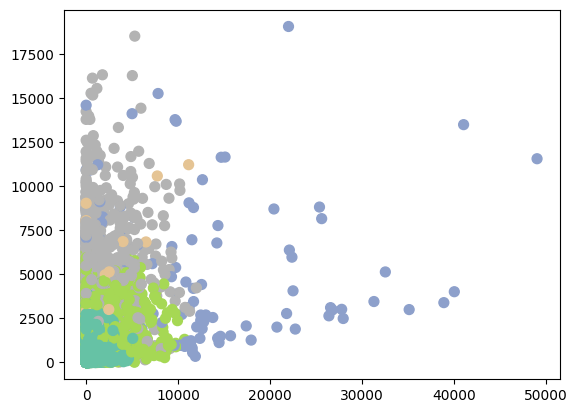

In [ ]:
plt.scatter(data['PURCHASES'], data['BALANCE'], c=y_kmeans, s=50, cmap='Set2')

In [ ]:
model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2],model.cluster_centers_[:,3]
#L'alogorithme choisi au fur et à mesure les meilleurs centres

(array([ 789.34598665, 4792.50249772, 1643.62722681, 4058.1476883 ,
        5428.1273154 ]),
 array([0.84846918, 0.906825  , 0.90699885, 0.98863638, 0.95712677]),
 array([  486.7902242 , 11734.70990991,  1447.35671365,  1027.37875   ,
         1547.73387597]),
 array([ 233.63917361, 8378.42693694,  901.5554853 ,  118.38946429,
         959.20972315]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


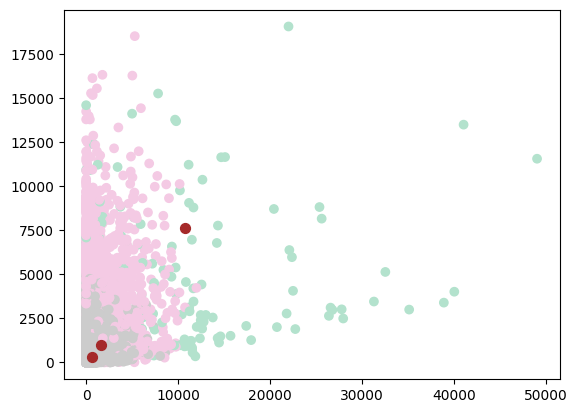

In [ ]:
model = KMeans(n_clusters=3)
model.fit(data)
model.predict(data)
plt.scatter(data['PURCHASES'], data['BALANCE'], c=model.predict(data), cmap='Pastel2_r')
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3],c='brown', s=50)


In [ ]:
#Fonction coût de notre modèle : inertia
model.inertia_
#Somme des distances entre les point d'un cluster et le centroid

232838718416.80542

In [ ]:
#Try different k values and select the best one

#Calculating the squared distance of each point from its closest cluster .

squared_distances = []
K = range(1,20)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data)
  squared_distances.append(km.inertia_)
print(squared_distances)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[393152981644.78815, 279341214546.02563, 232837872181.68683, 206857919884.65897, 182176777581.74625, 162389115705.5547, 145307497375.00696, 132874696335.52031, 124167300032.47253, 116155860733.19685, 109177658060.77634, 102867847124.4704, 98075922363.54199, 94502201052.63232, 91390141731.93703, 87688228187.17795, 84964158643.42258, 82433108983.2106, 80415228100.24562]


Text(0, 0.5, 'Coût du modèle inertia ')

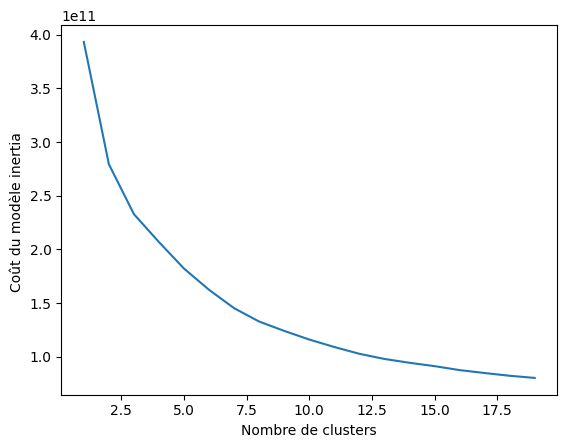

In [ ]:
plt.plot(K, squared_distances)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle inertia ')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


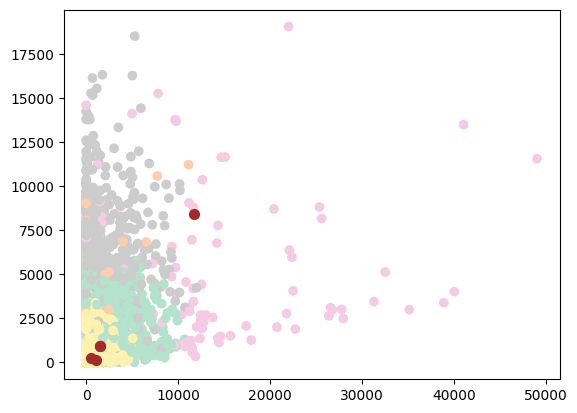

In [ ]:
model = KMeans(n_clusters=5)
model.fit(data)
model.predict(data)
plt.scatter(data['PURCHASES'], data['BALANCE'], c=model.predict(data), cmap='Pastel2_r')
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3],c='brown', s=50)


In [ ]:
#Fonction coût de notre modèle : inertia
model.inertia_
#Somme des distances entre les point d'un cluster et le centroid

182177131733.97678

**OBSERVATION** 👀

La fonction coût de notre modèle avec un nombre de clusters égal à 5 est meilleur qu'avec celle avec un nombre de clusters avec 3.